In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import numpy as np
from keras.preprocessing import image

In [2]:
classifier = Sequential()

In [4]:
classifier.add(Convolution2D(32, (3, 3), input_shape=(64,64,3), activation='relu'))

In [5]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [6]:
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [7]:
classifier.add(Flatten())

In [8]:
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

In [9]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('C:/Users/Admin/Pothole/pothole-detection-dataset',
                                                target_size=(64, 64),
                                                batch_size=32,
                                                class_mode='binary')

test_set = test_datagen.flow_from_directory('C:/Users/Admin/Pothole/pothole-detection-dataset',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 681 images belonging to 2 classes.
Found 681 images belonging to 2 classes.


In [25]:
classifier.fit_generator(training_set,
        steps_per_epoch=10,
        epochs=20,
        validation_data=test_set,
        validation_steps=101)


C:\Users\Admin\AppData\Local\Temp\ipykernel_12008\3599506802.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


Epoch 1/20
10/10 [==============================] - 58s 6s/step - loss: 0.1842 - accuracy: 0.9360 - val_loss: 0.1798 - val_accuracy: 0.9178
Epoch 2/20
10/10 [==============================] - 16s 2s/step - loss: 0.1620 - accuracy: 0.9428
Epoch 3/20
10/10 [==============================] - 19s 2s/step - loss: 0.1581 - accuracy: 0.9187
Epoch 4/20
10/10 [==============================] - 15s 2s/step - loss: 0.1420 - accuracy: 0.9394
Epoch 5/20
10/10 [==============================] - 18s 2s/step - loss: 0.1436 - accuracy: 0.9394
Epoch 6/20
10/10 [==============================] - 18s 2s/step - loss: 0.1448 - accuracy: 0.9469
Epoch 7/20
10/10 [==============================] - 17s 2s/step - loss: 0.1277 - accuracy: 0.9562
Epoch 8/20
10/10 [==============================] - 17s 2s/step - loss: 0.2093 - accuracy: 0.9158
Epoch 9/20
10/10 [==============================] - 17s 2s/step - loss: 0.1553 - accuracy: 0.9375
Epoch 10/20
10/10 [==============================] - 18s 2s/step - loss: 0.2

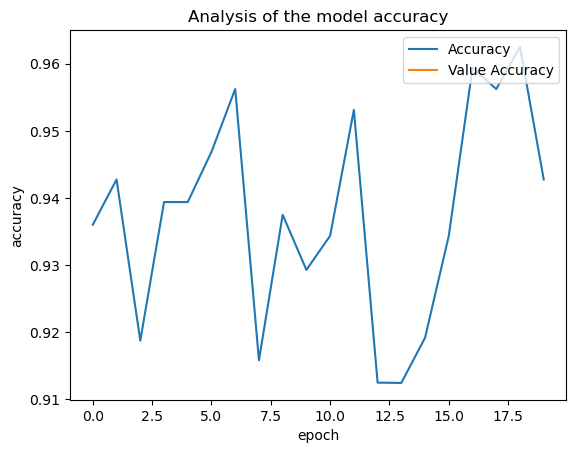

In [26]:
plt.plot(classifier.history.history['accuracy'])
plt.plot(classifier.history.history['val_accuracy'])
plt.title('Analysis of the model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Value Accuracy'], loc='upper right')
plt.show()

1/1 [==============================] - 0s 46ms/step
normal


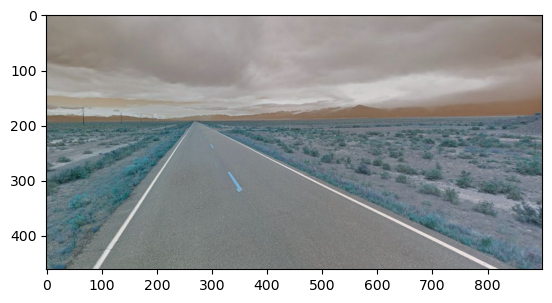

In [22]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('C:/Users/Admin/Pothole/pothole-detection-dataset/normal/2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
plt.imshow(cv2.imread("C:/Users/Admin/Pothole/pothole-detection-dataset/normal/2.jpg"))
if result[0][0] == 1:
  prediction = 'pothole'
else:
  prediction = 'normal'

#final result 
print(prediction)

1/1 [==============================] - 0s 50ms/step
pothole


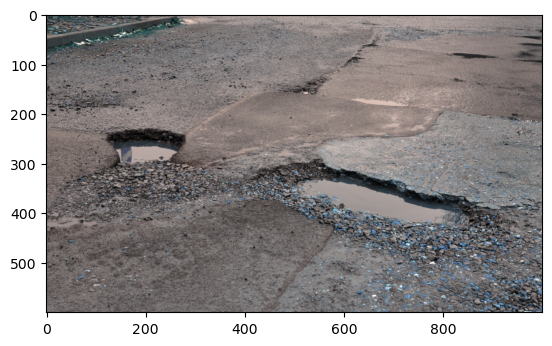

In [23]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('C:/Users/Admin/Pothole/pothole-detection-dataset/potholes/2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
plt.imshow(cv2.imread("C:/Users/Admin/Pothole/pothole-detection-dataset/potholes/2.jpg"))
if result[0][0] == 1:
  prediction = 'pothole'
else:
  prediction = 'normal'

#final result 
print(prediction)